### Importing the Packages

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the matplotlib, seaborn, numpy and pandas packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the clustering related packages
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Reading the CSV file

In [2]:
country_df = pd.read_csv('Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Understanding the data

##### Shape of dataframe

In [3]:
country_df.shape

(167, 10)

##### Information on dataframe

In [4]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


##### Null Percentage

In [5]:
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

**Observation** There are no null values in the dataframe

##### Converting columns exports, import and health which is in percentage

In [6]:
country_df['export_nos'] = round(country_df.exports/100 * country_df.gdpp, 2)
country_df['import_nos'] = round(country_df.imports/100 * country_df.gdpp, 2)
country_df['health_nos'] = round(country_df.health/100 * country_df.gdpp, 2)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,export_nos,import_nos,health_nos
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,248.30,41.92
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,1987.74,267.90
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,1400.44,185.98
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,1514.37,100.60
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,7185.80,735.66


##### Description of numerical variables of modified dataframe

In [7]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,export_nos,import_nos,health_nos
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,7420.618862,6588.352096,1056.732934
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,17973.885789,14710.810423,1801.409031
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,1.080000,0.650000,12.820000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,640.215000,78.535000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,2045.580000,321.890000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,7719.600000,976.940000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,183750.000000,149100.000000,8663.600000


### Univariate Analysis

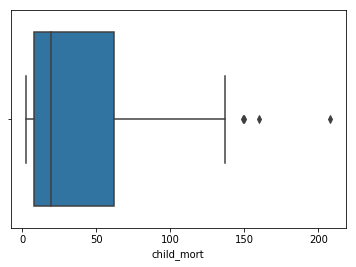

In [8]:
sns.boxplot(country_df.child_mort)
plt.show()

**Observation** There are few countries which have very child mortality rate

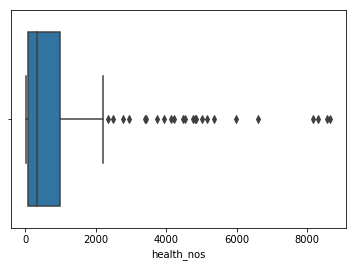

In [9]:
sns.boxplot(country_df.health_nos)
plt.show()

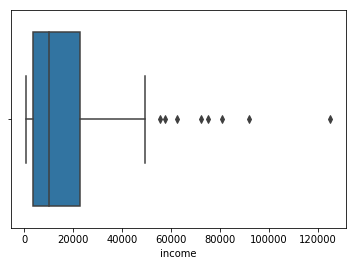

In [10]:
sns.boxplot(country_df.income)
plt.show()

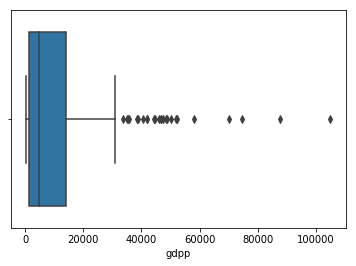

In [11]:
sns.boxplot(country_df.gdpp)
plt.show()

### Bivariate Analysis

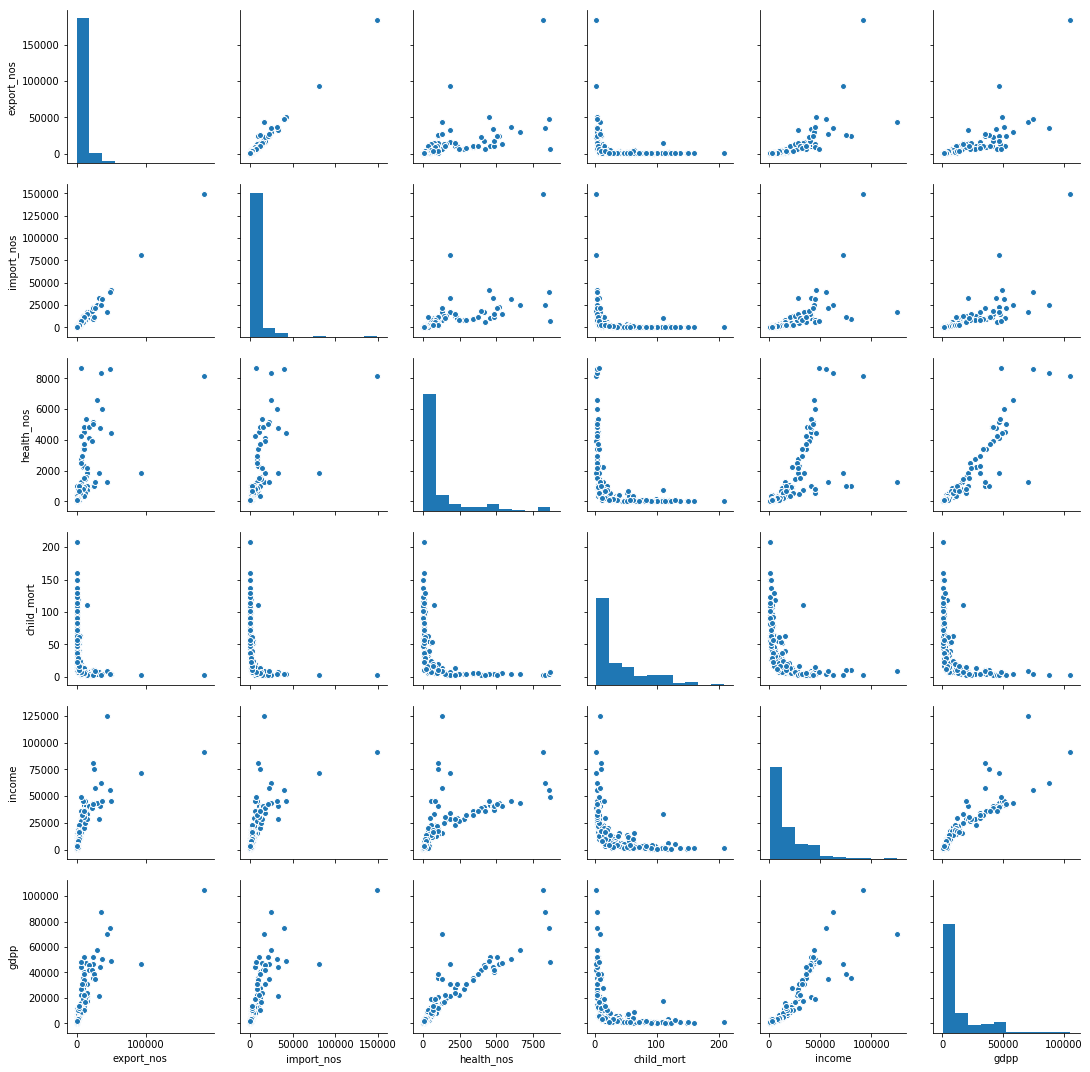

In [12]:
sns.pairplot(country_df[['export_nos','import_nos','health_nos','child_mort','income','gdpp']])

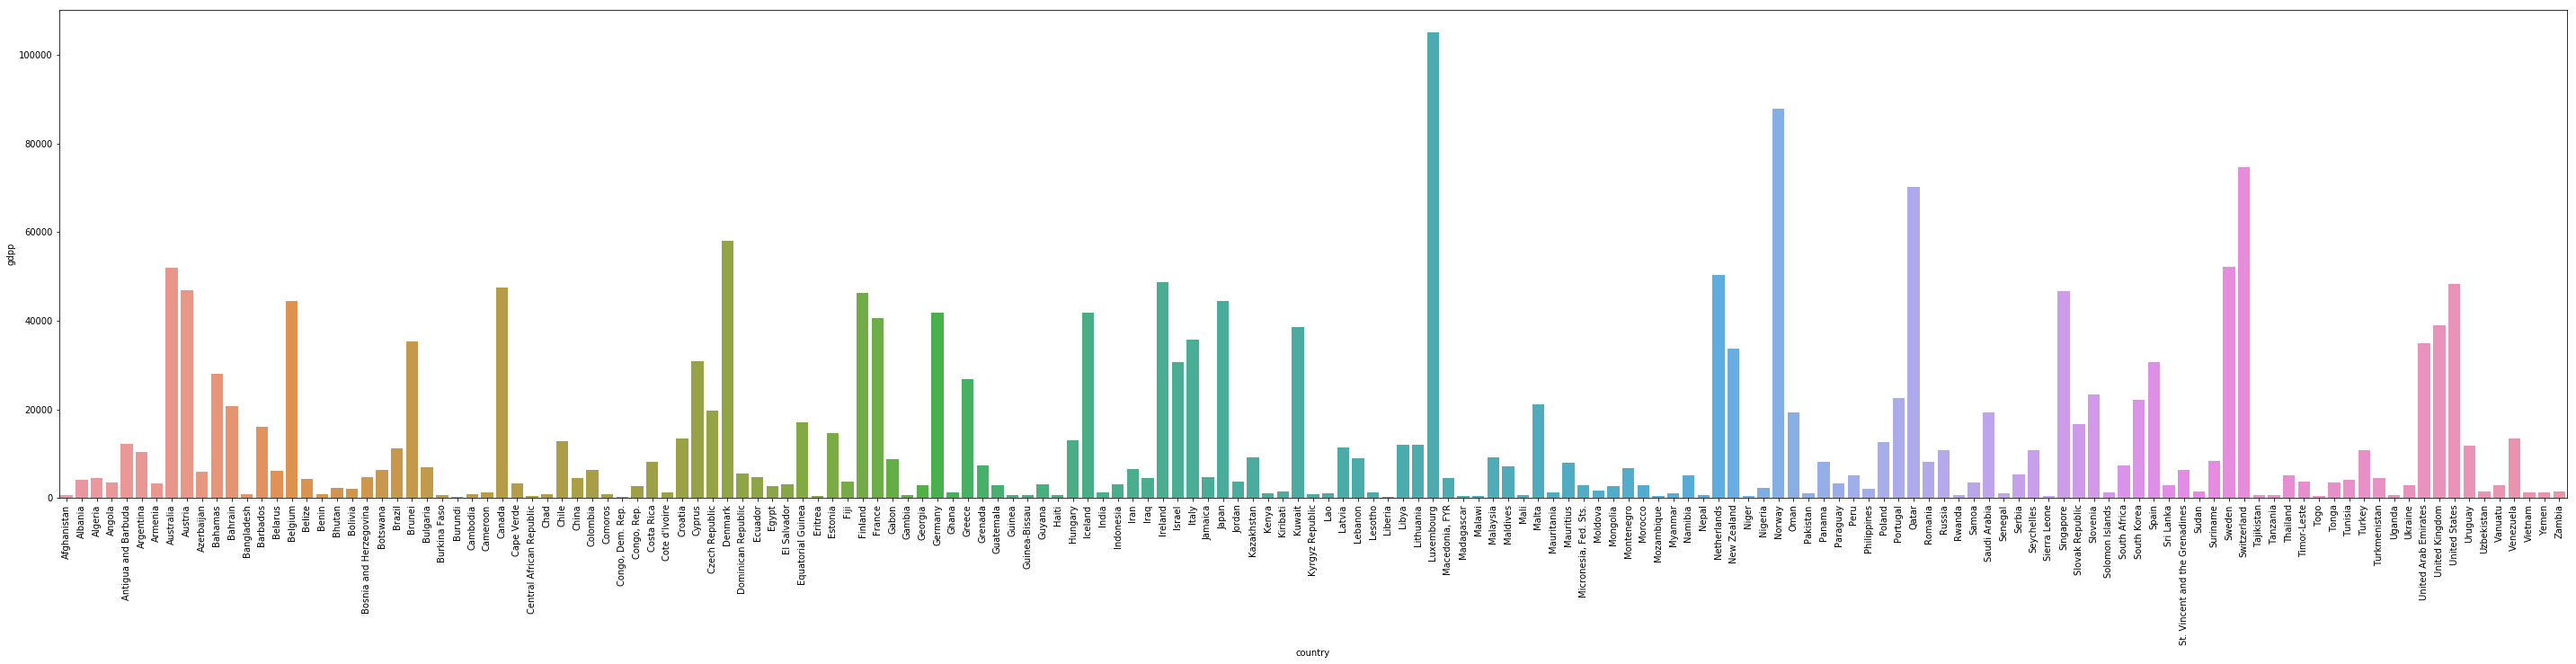

In [13]:
plt.figure(figsize=(50,10))
sns.barplot(country_df.country, country_df.gdpp)
plt.xticks(rotation=90)
plt.show()

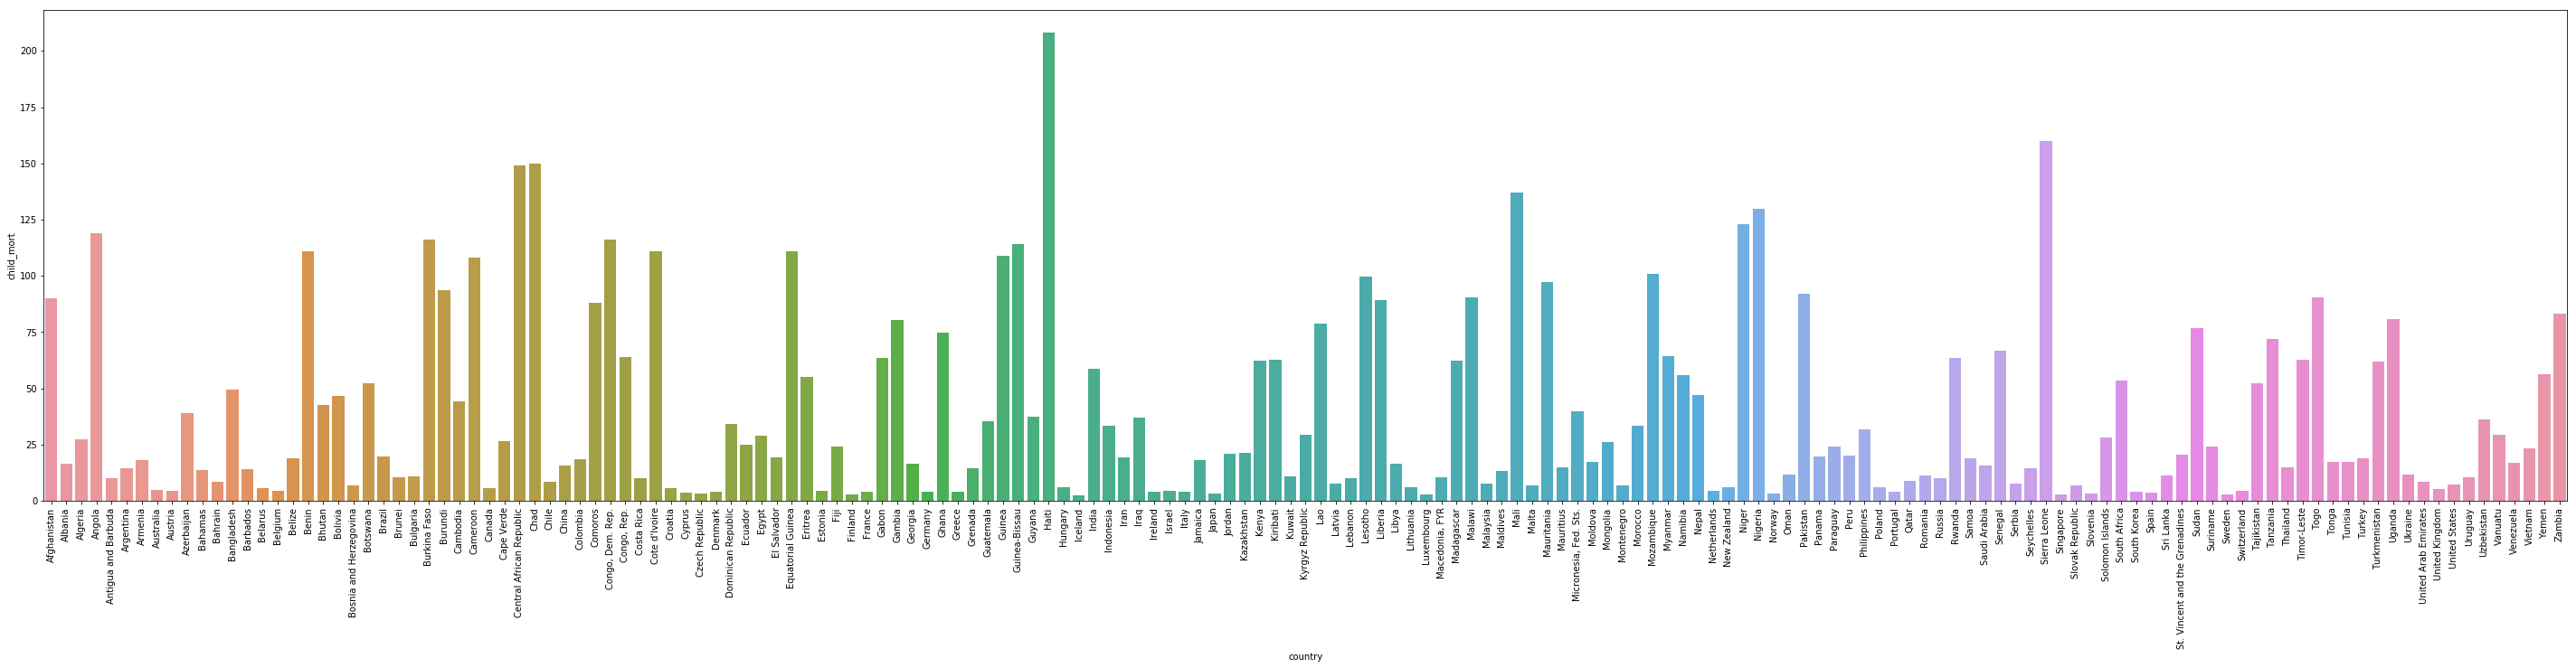

In [14]:
plt.figure(figsize=(50,10))
sns.barplot(country_df.country, country_df.child_mort)
plt.xticks(rotation=90)
plt.show()

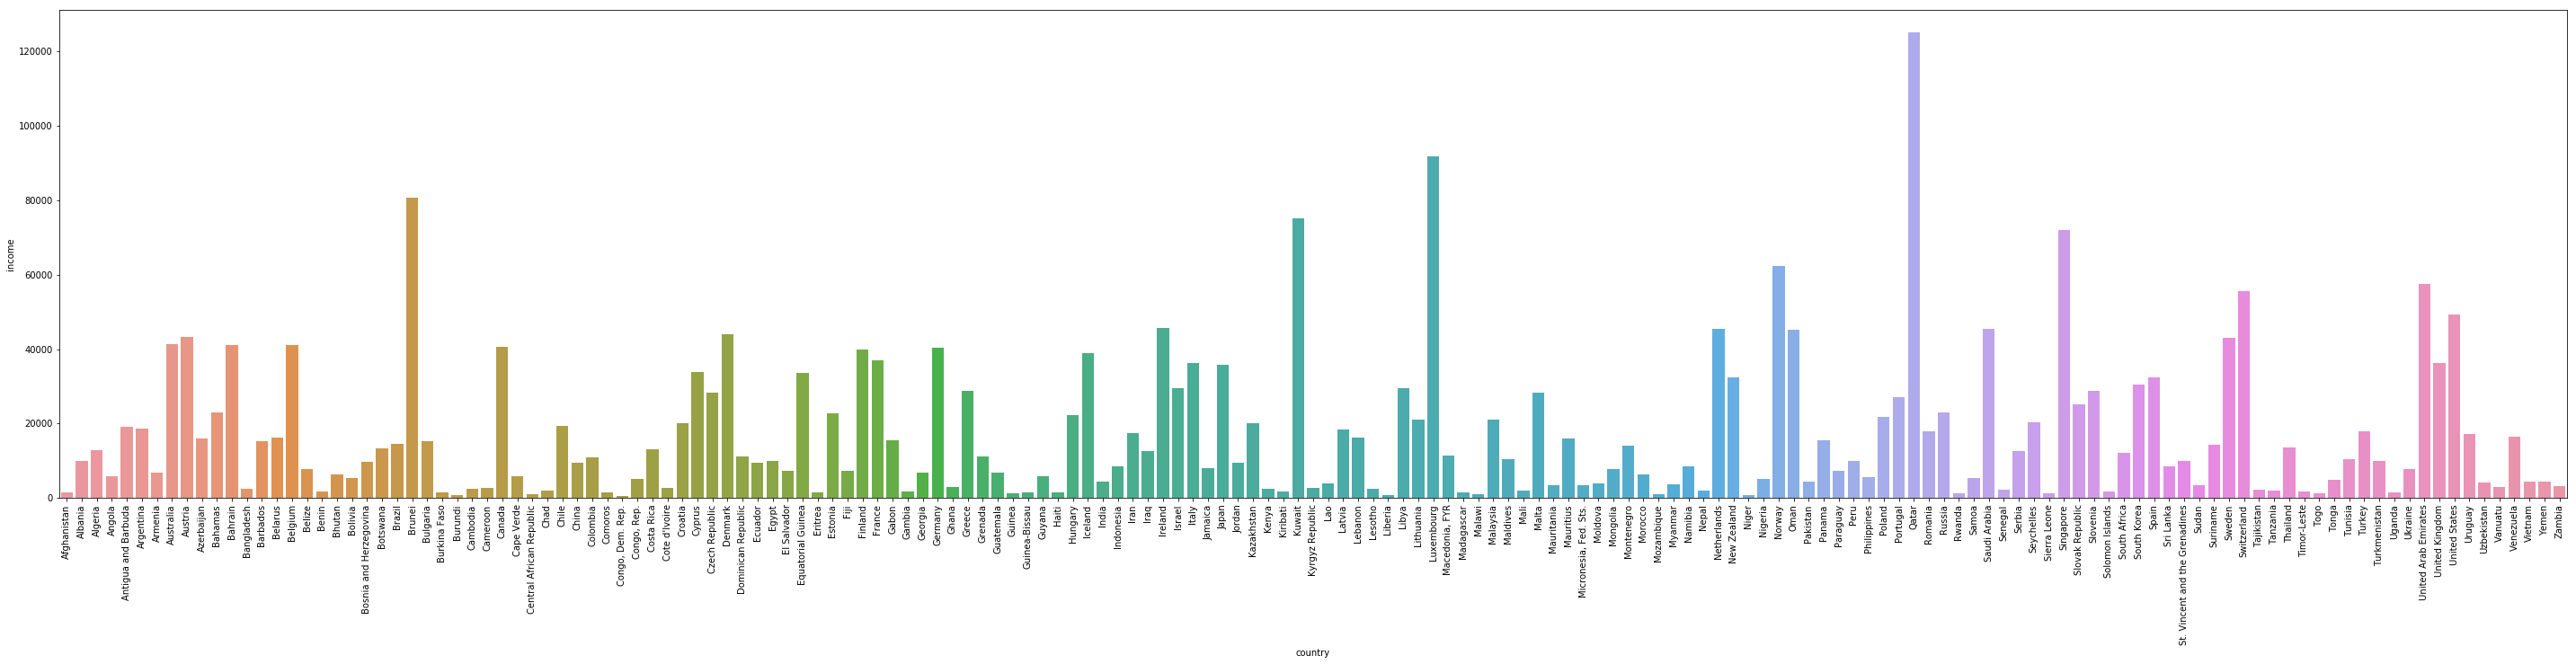

In [15]:
plt.figure(figsize=(50,10))
sns.barplot(country_df.country, country_df.income)
plt.xticks(rotation=90)
plt.show()

### Outlier Treatment

- After capping the column health_nos to 1% and 99%, there is no much difference seen

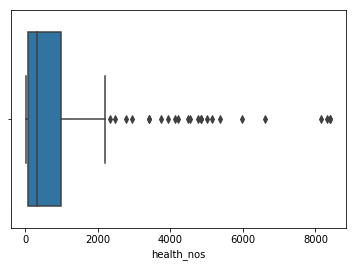

In [16]:
country_df.health_nos = np.clip(country_df.health_nos, country_df.health_nos.quantile([0.01, 0.99][0]),
                          country_df.health_nos.quantile([0.01, 0.99][1]))
sns.boxplot(country_df.health_nos)
plt.show()

- After capping the column Child Mortality to 1% and 99%

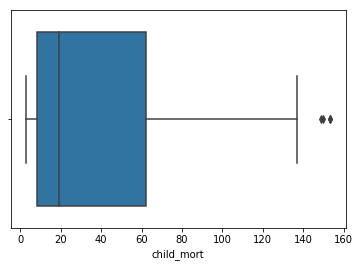

In [17]:
country_df.child_mort = np.clip(country_df.child_mort, country_df.child_mort.quantile([0.01, 0.99][0]),
                          country_df.child_mort.quantile([0.01, 0.99][1]))
sns.boxplot(country_df.child_mort)
plt.show()

- After capping the column income to 1% and 99%

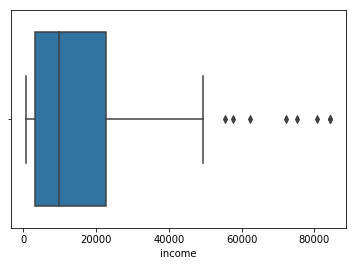

In [18]:
country_df.income = np.clip(country_df.income, country_df.income.quantile([0.01, 0.99][0]),
                          country_df.income.quantile([0.01, 0.99][1]))
sns.boxplot(country_df.income)
plt.show()

- After capping the column gdpp to 1% and 99%

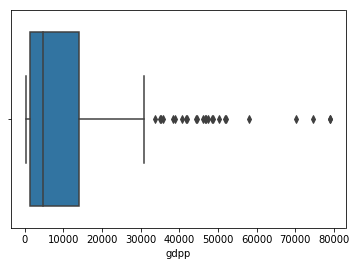

In [19]:
country_df.gdpp = np.clip(country_df.gdpp, country_df.gdpp.quantile([0.01, 0.99][0]),
                          country_df.gdpp.quantile([0.01, 0.99][1]))
sns.boxplot(country_df.gdpp)
plt.show()

### Scaling

In [20]:
group_df = country_df[['country', 'child_mort', 'gdpp', 'income']]

# instantiate
scaler = StandardScaler()

# fit_transform
group_df_scaled = scaler.fit_transform(group_df[['child_mort', 'gdpp', 'income']])
group_df_scaled.shape

(167, 3)

In [21]:
group_df_scaled = pd.DataFrame(group_df_scaled)
group_df_scaled.columns = ['child_mort', 'gdpp', 'income']
group_df_scaled.head()

,child_mort,gdpp,income
0,1.344012,-0.702314,-0.851772
1,-0.547543,-0.498775,-0.387025
2,-0.272548,-0.477483,-0.221124
3,2.084186,-0.531000,-0.612136
4,-0.709457,-0.032079,0.125202


### Hopkins Statistics

In [22]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
hopkins(group_df_scaled)

0.9372124894249393

- The value `0.95` is `1` implies that the data can be clustered.

### K-Means Clustering

##### k-means with some arbitrary k (k = 4)

In [24]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(group_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       2, 2, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 2, 3, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 3, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

##### Elbow curve

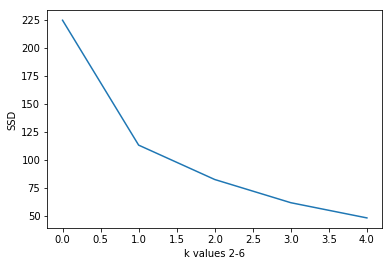

In [26]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(group_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSD for each n clusters
plt.plot(ssd)
plt.xlabel('k values 2-6')
plt.ylabel('SSD')
plt.show()

##### Silhouette Analysis

In [27]:
range_n_clusters = [2, 3, 4, 5, 6]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(group_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(group_df_scaled, cluster_labels)
    print("For n clusters = {0}, the silhouette score : {1}".format(num_clusters, silhouette_avg))

For n clusters = 2, the silhouette score : 0.566490989486534
For n clusters = 3, the silhouette score : 0.537034312216317
For n clusters = 4, the silhouette score : 0.5366883931729207
For n clusters = 5, the silhouette score : 0.46611852244125146
For n clusters = 6, the silhouette score : 0.4549327005696092


- As the silhouette score of n cluster 3 and 4 are almost same that is 0.54, picking K to be 3. Even there is a significant bent in the elbow for K=3

##### Final model using K-Means with k = 3

In [28]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=50)
kmeans.fit(group_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [29]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [30]:
kmeans_df = pd.DataFrame(kmeans.labels_, columns=['cluster_id'])
kmeans_df = pd.concat([group_df, kmeans_df], axis=1)
kmeans_df.head()

,country,child_mort,gdpp,income,cluster_id
0,Afghanistan,90.2,553.0,1610.0,1
1,Albania,16.6,4090.0,9930.0,2
2,Algeria,27.3,4460.0,12900.0,2
3,Angola,119.0,3530.0,5900.0,1
4,Antigua and Barbuda,10.3,12200.0,19100.0,2


##### Child mortality rate with respect clusters obtained

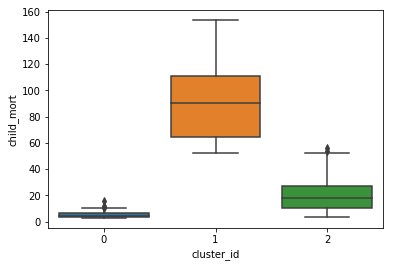

In [31]:
sns.boxplot(kmeans_df.cluster_id, kmeans_df.child_mort)
plt.show()

- From above graph, we can say that `cluster 1` has high child mortality rate and `cluster 0` has less child mortality rate

##### Income range with respect clusters obtained

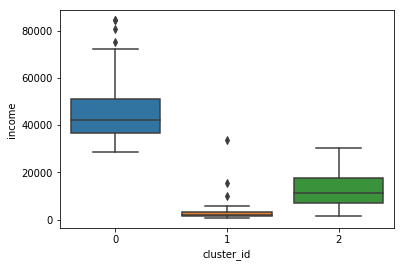

In [32]:
sns.boxplot(kmeans_df.cluster_id, kmeans_df.income)
plt.show()

- From above graph, we can say that `cluster 1` has low income and `cluster 0` has high income.

##### GDPP with respect clusters obtained

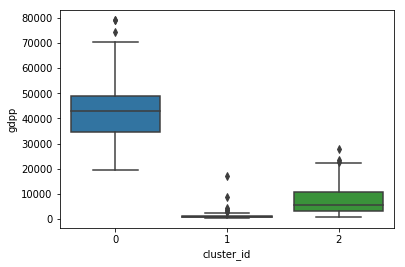

In [33]:
sns.boxplot(kmeans_df.cluster_id, kmeans_df.gdpp)
plt.show()

- From above graph, we can say that `cluster 1` has low GDPP and `cluster 0` has high GDPP

In [34]:
kmeans_df.groupby(by='cluster_id').mean()

,child_mort,gdpp,income
cluster_id,,,
0,5.600000,44008.625000,47464.000000
1,92.478723,1588.366809,3386.988936
2,20.504545,7358.704545,12924.431818


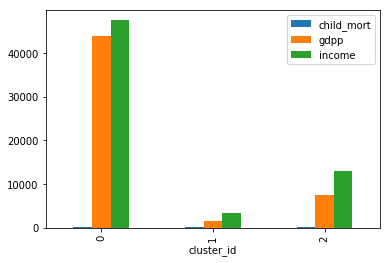

In [35]:
kmeans_df.groupby(by='cluster_id').mean().plot(kind='bar')
plt.show()

- Based on the above graphs and table, `cluster 1` is the intented group which is in need of aid as the countries in this group has `low GDPP, low Income and high Child mortality rate`.

##### Dataframe of countries with low GDPP, low Income and high Child mortality rate

In [36]:
under_develop = kmeans_df[kmeans_df.cluster_id == 1]
under_develop.head()

,country,child_mort,gdpp,income,cluster_id
0,Afghanistan,90.2,553.00,1610.0,1
3,Angola,119.0,3530.00,5900.0,1
17,Benin,111.0,758.00,1820.0,1
25,Burkina Faso,116.0,575.00,1430.0,1
26,Burundi,93.6,331.62,764.0,1


##### Top 5 countries with highest child mortality rate

In [37]:
under_develop.sort_values(by='child_mort', ascending=False).head()

,country,child_mort,gdpp,income,cluster_id
132,Sierra Leone,153.4,399.0,1220.0,1
66,Haiti,153.4,662.0,1500.0,1
32,Chad,150.0,897.0,1930.0,1
31,Central African Republic,149.0,446.0,888.0,1
97,Mali,137.0,708.0,1870.0,1


##### Top 5 countries with low income

In [38]:
under_develop.sort_values(by='income').head()

,country,child_mort,gdpp,income,cluster_id
88,Liberia,89.3,331.62,742.24,1
37,"Congo, Dem. Rep.",116.0,334.00,742.24,1
26,Burundi,93.6,331.62,764.00,1
112,Niger,123.0,348.00,814.00,1
31,Central African Republic,149.0,446.00,888.00,1


##### Top 5 countries with low gdpp

In [39]:
under_develop.sort_values(by='gdpp').head()

,country,child_mort,gdpp,income,cluster_id
26,Burundi,93.6,331.62,764.00,1
88,Liberia,89.3,331.62,742.24,1
37,"Congo, Dem. Rep.",116.0,334.00,742.24,1
112,Niger,123.0,348.00,814.00,1
132,Sierra Leone,153.4,399.00,1220.00,1


- GDPP gives an overall view of the country's socio-economic status and also its contribution for health sector.

### Hierarchical Clustering

In [40]:
group_df_scaled.head()

,child_mort,gdpp,income
0,1.344012,-0.702314,-0.851772
1,-0.547543,-0.498775,-0.387025
2,-0.272548,-0.477483,-0.221124
3,2.084186,-0.531000,-0.612136
4,-0.709457,-0.032079,0.125202


In [41]:
group_df.head()

,country,child_mort,gdpp,income
0,Afghanistan,90.2,553.0,1610.0
1,Albania,16.6,4090.0,9930.0
2,Algeria,27.3,4460.0,12900.0
3,Angola,119.0,3530.0,5900.0
4,Antigua and Barbuda,10.3,12200.0,19100.0


##### Single Linkage

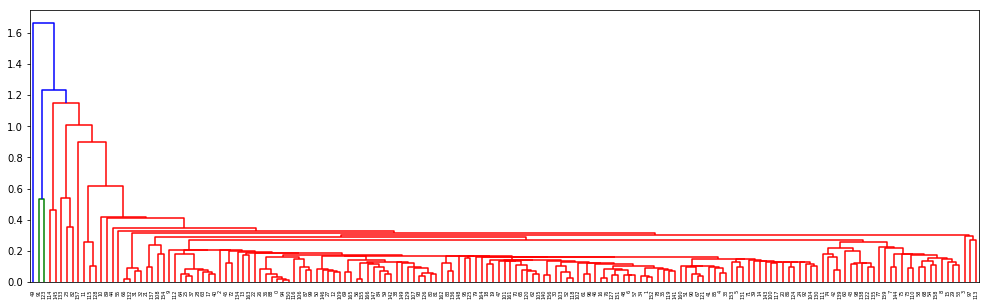

In [42]:
plt.figure(figsize=(17,5))
merging = linkage(group_df_scaled, method='single', metric='euclidean')
dendrogram(merging)
plt.show()

##### Complete Linkage

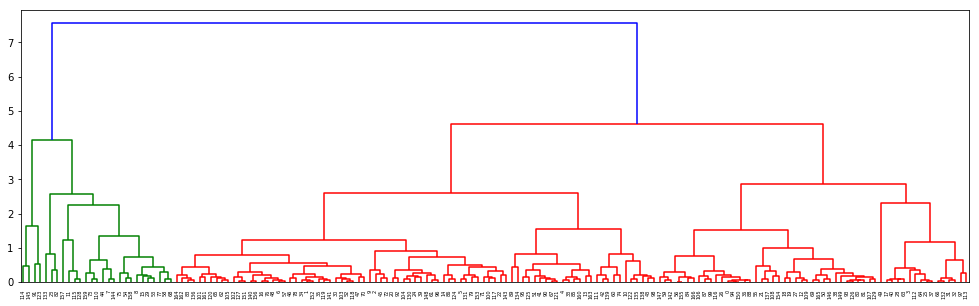

In [43]:
plt.figure(figsize=(17,5))
merging = linkage(group_df_scaled, method='complete', metric='euclidean')
dendrogram(merging)
plt.show()

##### Selecting n_clusters to be 3

In [44]:
cluster_labels = cut_tree(merging, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [45]:
hierarchical_df = pd.DataFrame(cluster_labels, columns=['cluster_labels'])
hierarchical_df = pd.concat([group_df, hierarchical_df], axis=1)
hierarchical_df.head()

,country,child_mort,gdpp,income,cluster_labels
0,Afghanistan,90.2,553.0,1610.0,0
1,Albania,16.6,4090.0,9930.0,1
2,Algeria,27.3,4460.0,12900.0,1
3,Angola,119.0,3530.0,5900.0,0
4,Antigua and Barbuda,10.3,12200.0,19100.0,1


##### Child mortality rate with respect clusters obtained

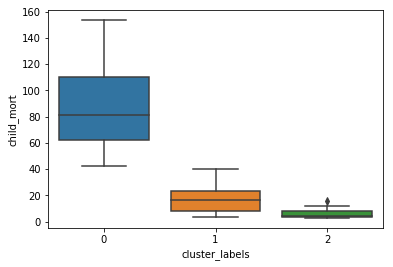

In [46]:
sns.boxplot(hierarchical_df.cluster_labels, hierarchical_df.child_mort)
plt.show()

- From above graph, we can say that `cluster 0` has high child mortality rate and `cluster 2` has less child mortality rate

##### Income range with respect clusters obtained

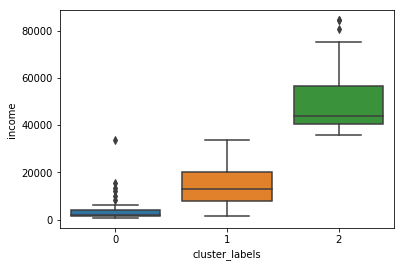

In [47]:
sns.boxplot(hierarchical_df.cluster_labels, hierarchical_df.income)
plt.show()

- From above graph, we can say that `cluster 0` has low income and `cluster 2` has high income.

##### GDPP with respect clusters obtained

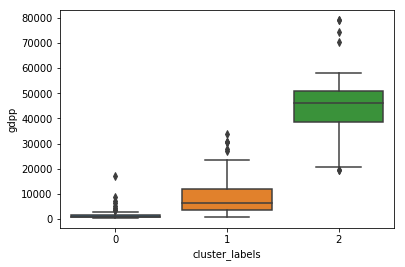

In [48]:
sns.boxplot(hierarchical_df.cluster_labels, hierarchical_df.gdpp)
plt.show()

- From above graph, we can say that `cluster 0` has low gdpp and `cluster 2` has high gdpp.

In [49]:
hierarchical_df.groupby(by='cluster_labels').mean()

,child_mort,gdpp,income
cluster_labels,,,
0,86.160000,1813.986182,3849.608727
1,16.872941,9119.411765,14609.529412
2,5.818519,46502.814815,50438.814815


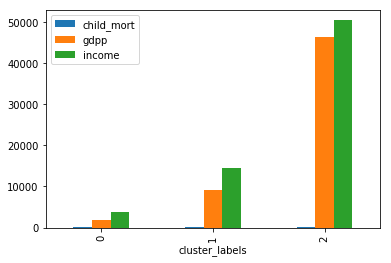

In [50]:
hierarchical_df.groupby(by='cluster_labels').mean().plot(kind='bar')
plt.show()

In [51]:
under_developed = hierarchical_df[hierarchical_df.cluster_labels == 0]
under_developed.head()

,country,child_mort,gdpp,income,cluster_labels
0,Afghanistan,90.2,553.0,1610.0,0
3,Angola,119.0,3530.0,5900.0,0
12,Bangladesh,49.4,758.0,2440.0,0
17,Benin,111.0,758.0,1820.0,0
18,Bhutan,42.7,2180.0,6420.0,0


In [52]:
under_developed.sort_values(by='child_mort', ascending=False).head()

,country,child_mort,gdpp,income,cluster_labels
66,Haiti,153.4,662.0,1500.0,0
132,Sierra Leone,153.4,399.0,1220.0,0
32,Chad,150.0,897.0,1930.0,0
31,Central African Republic,149.0,446.0,888.0,0
97,Mali,137.0,708.0,1870.0,0


In [53]:
under_developed.sort_values(by='income').head()

,country,child_mort,gdpp,income,cluster_labels
37,"Congo, Dem. Rep.",116.0,334.00,742.24,0
88,Liberia,89.3,331.62,742.24,0
26,Burundi,93.6,331.62,764.00,0
112,Niger,123.0,348.00,814.00,0
31,Central African Republic,149.0,446.00,888.00,0


In [54]:
under_developed.sort_values(by='gdpp').head()

,country,child_mort,gdpp,income,cluster_labels
88,Liberia,89.3,331.62,742.24,0
26,Burundi,93.6,331.62,764.00,0
37,"Congo, Dem. Rep.",116.0,334.00,742.24,0
112,Niger,123.0,348.00,814.00,0
132,Sierra Leone,153.4,399.00,1220.00,0


- GDPP gives an overall view of the country's socio-economic status and also its contribution for health sector.

The final list of 5 countries which are in direst need of aid are
1. Liberia
2. Burundi
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone